In [132]:
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# normal_directory = "Normal"
# attack_directory = "Attack"

# # Create lists to store normal and attack DataFrames
# normal_dataframes = []
# attack_dataframes = []

# # Loop through normal traffic files
# for filename in os.listdir(normal_directory):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(normal_directory, filename)
#         df = pd.read_csv(file_path)
#         normal_dataframes.append(df)

# # Loop through attack traffic files
# for filename in os.listdir(attack_directory):
#     if filename.endswith(".csv"):
#         file_path = os.path.join(attack_directory, filename)
#         df = pd.read_csv(file_path)
#         attack_dataframes.append(df)

# # Concatenate normal and attack DataFrames separately
# normal_concatenated_df = pd.concat(normal_dataframes, ignore_index=True)
# attack_concatenated_df = pd.concat(attack_dataframes, ignore_index=True)

# # Assign labels to the concatenated DataFrames
# normal_concatenated_df['label'] = 'normal'
# attack_concatenated_df['label'] = 'attack'

# # Combine normal and attack DataFrames into a single DataFrame
# combined_df = pd.concat([normal_concatenated_df, attack_concatenated_df], ignore_index=True)

In [73]:
# combined_df.to_csv('combined_df.csv')

In [133]:
combined_df=pd.read_csv('/kaggle/input/finaldataset/final.csv')

In [134]:
combined_df['label'].value_counts()

label
normal    579838
attack    472372
Name: count, dtype: int64

In [135]:
combined_df[combined_df['label']=='attack']

,Unnamed: 0,No.,Time,Source,Destination,Protocol,Length,Info,label
579838,579838,240199,579.675963,192.168.1.127,172.168.1.44,DISCARD,632,Discard,attack
579839,579839,333592,668.122553,192.168.1.127,172.168.1.44,DISCARD,632,Discard,attack
579840,579840,259644,593.640397,192.168.1.127,172.168.1.44,DISCARD,632,Discard,attack
579841,579841,212349,559.680431,192.168.1.127,172.168.1.44,DISCARD,632,Discard,attack
579842,579842,114297,398.450919,192.168.1.127,172.168.1.44,DISCARD,632,Discard,attack
...,...,...,...,...,...,...,...,...,...
1052205,1052205,12,486.082700,172.168.1.44,192.168.1.127,SIP,440,Request: BYE sip:User1@10.10.10.39:5060 |,attack
1052206,1052206,6,284.208999,172.168.1.44,192.168.1.127,SIP,440,Request: BYE sip:User3@10.10.10.34:5060 |,attack
1052207,1052207,5,59.407342,45.143.220.59,172.168.1.44,SIP,458,Request: OPTIONS sip:100@18.156.12.171 |,attack
1052208,1052208,1,0.000000,172.168.1.44,192.168.1.127,SIP,440,Request: BYE sip:User2@10.10.10.22:5060 |,attack


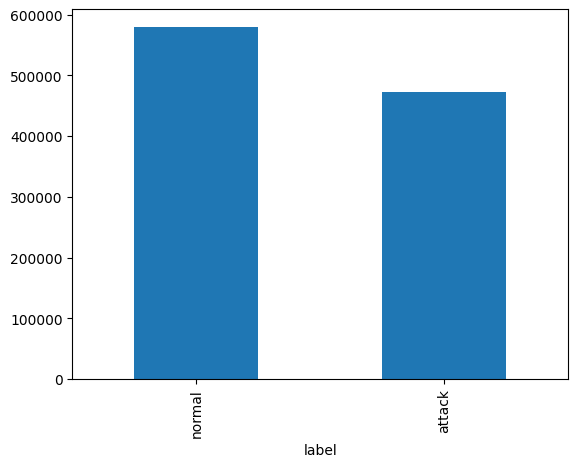

In [136]:
import matplotlib.pyplot as plt
combined_df['label'].value_counts().plot(kind='bar')
plt.show()

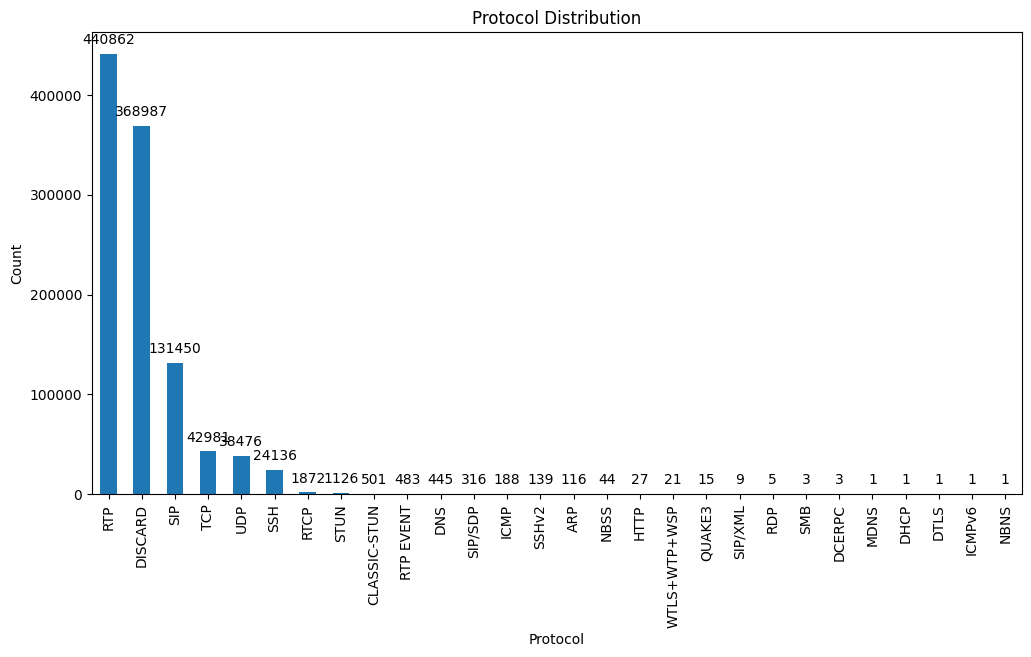

In [137]:
plt.figure(figsize=(12, 6))
ax = combined_df['Protocol'].value_counts().plot(kind='bar')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Protocol Distribution')

# Adding count numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
import ipaddress
import re

def convert_address_to_numeric(address):
    if ':' in address:
        # MAC address
        mac_address = re.sub(r':', '', address)
        return int(mac_address, 16)
    else:
        # IPv4 address
        try:
            return int(ipaddress.IPv4Address(address))
        except ValueError:
            # Handle non-IPv4 addresses
            return address


In [138]:
combined_df = combined_df[(combined_df['Source'].apply(lambda x: '.' in x or ':' in x)) &
                          (combined_df['Destination'].apply(lambda x: '.' in x or ':' in x))]

# Apply the convert_address_to_numeric function
combined_df['Source'] = combined_df['Source'].apply(convert_address_to_numeric)
combined_df['Destination'] = combined_df['Destination'].apply(convert_address_to_numeric)

In [102]:
combined_df = combined_df.drop(['No.','Info'], axis=1)

In [139]:
combined_df = combined_df.drop('Unnamed: 0', axis=1)

In [104]:
combined_df

,Time,Source,Destination,Protocol,Length,label
0,129.261162,168430118,3232235903,RTP,214,normal
1,907.692062,3232235903,168430118,RTP,214,normal
2,897.916816,168430118,3232235903,RTP,214,normal
3,124.102652,3232235903,168430118,RTP,214,normal
4,113.862565,3232235903,168430118,RTP,214,normal
...,...,...,...,...,...,...
1052205,486.082700,2896691500,3232235903,SIP,440,attack
1052206,284.208999,2896691500,3232235903,SIP,440,attack
1052207,59.407342,764402747,2896691500,SIP,458,attack
1052208,0.000000,2896691500,3232235903,SIP,440,attack


In [140]:
combined_df['Protocol'] = combined_df['Protocol'].astype('category')

In [141]:
protocol_dummies = pd.get_dummies(combined_df['Protocol'], prefix='Protocol')
combined_df = pd.concat([combined_df, protocol_dummies.astype(int)], axis=1)
# combined_df = combined_df.drop('Protocol', axis=1)



In [142]:
combined_df = combined_df.drop('Protocol', axis=1)

In [143]:
combined_df.columns

Index(['No.', 'Time', 'Source', 'Destination', 'Length', 'Info', 'label',
       'Protocol_ARP', 'Protocol_CLASSIC-STUN', 'Protocol_DCERPC',
       'Protocol_DHCP', 'Protocol_DISCARD', 'Protocol_DNS', 'Protocol_DTLS',
       'Protocol_HTTP', 'Protocol_ICMP', 'Protocol_ICMPv6', 'Protocol_MDNS',
       'Protocol_NBNS', 'Protocol_NBSS', 'Protocol_QUAKE3', 'Protocol_RDP',
       'Protocol_RTCP', 'Protocol_RTP', 'Protocol_RTP EVENT', 'Protocol_SIP',
       'Protocol_SIP/SDP', 'Protocol_SIP/XML', 'Protocol_SMB', 'Protocol_SSH',
       'Protocol_SSHv2', 'Protocol_STUN', 'Protocol_TCP', 'Protocol_UDP',
       'Protocol_WTLS+WTP+WSP'],
      dtype='object')

In [144]:
combined_df

,No.,Time,Source,Destination,Length,Info,label,Protocol_ARP,Protocol_CLASSIC-STUN,Protocol_DCERPC,...,Protocol_SIP,Protocol_SIP/SDP,Protocol_SIP/XML,Protocol_SMB,Protocol_SSH,Protocol_SSHv2,Protocol_STUN,Protocol_TCP,Protocol_UDP,Protocol_WTLS+WTP+WSP
0,4118,129.261162,168430118,3232235903,214,"PT=ITU-T G.711 PCMU, SSRC=0x89F86EDB, Seq=1936...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12849,907.692062,3232235903,168430118,214,"PT=ITU-T G.711 PCMU, SSRC=0x6CA6FF0C, Seq=3370...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11867,897.916816,168430118,3232235903,214,"PT=ITU-T G.711 PCMU, SSRC=0xD0C43B84, Seq=2993...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,124.102652,3232235903,168430118,214,"PT=ITU-T G.711 PCMU, SSRC=0x676BE4F6, Seq=2653...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2577,113.862565,3232235903,168430118,214,"PT=ITU-T G.711 PCMU, SSRC=0x676BE4F6, Seq=2601...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052205,12,486.082700,2896691500,3232235903,440,Request: BYE sip:User1@10.10.10.39:5060 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1052206,6,284.208999,2896691500,3232235903,440,Request: BYE sip:User3@10.10.10.34:5060 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1052207,5,59.407342,764402747,2896691500,458,Request: OPTIONS sip:100@18.156.12.171 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1052208,1,0.000000,2896691500,3232235903,440,Request: BYE sip:User2@10.10.10.22:5060 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [145]:
combined_df['Source'] = combined_df['Source'].astype(float)

In [146]:
combined_df

,No.,Time,Source,Destination,Length,Info,label,Protocol_ARP,Protocol_CLASSIC-STUN,Protocol_DCERPC,...,Protocol_SIP,Protocol_SIP/SDP,Protocol_SIP/XML,Protocol_SMB,Protocol_SSH,Protocol_SSHv2,Protocol_STUN,Protocol_TCP,Protocol_UDP,Protocol_WTLS+WTP+WSP
0,4118,129.261162,1.684301e+08,3232235903,214,"PT=ITU-T G.711 PCMU, SSRC=0x89F86EDB, Seq=1936...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12849,907.692062,3.232236e+09,168430118,214,"PT=ITU-T G.711 PCMU, SSRC=0x6CA6FF0C, Seq=3370...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11867,897.916816,1.684301e+08,3232235903,214,"PT=ITU-T G.711 PCMU, SSRC=0xD0C43B84, Seq=2993...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3607,124.102652,3.232236e+09,168430118,214,"PT=ITU-T G.711 PCMU, SSRC=0x676BE4F6, Seq=2653...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2577,113.862565,3.232236e+09,168430118,214,"PT=ITU-T G.711 PCMU, SSRC=0x676BE4F6, Seq=2601...",normal,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052205,12,486.082700,2.896692e+09,3232235903,440,Request: BYE sip:User1@10.10.10.39:5060 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1052206,6,284.208999,2.896692e+09,3232235903,440,Request: BYE sip:User3@10.10.10.34:5060 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1052207,5,59.407342,7.644027e+08,2896691500,458,Request: OPTIONS sip:100@18.156.12.171 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1052208,1,0.000000,2.896692e+09,3232235903,440,Request: BYE sip:User2@10.10.10.22:5060 |,attack,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# from imblearn.under_sampling import NearMiss

# #Split the data into features and target
# X = combined_df.drop('label', axis=1)
# y = combined_df['label']

# from imblearn.under_sampling import RandomUnderSampler

# undersampler = RandomUnderSampler()
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# # Convert the resampled data back to a DataFrame
# data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [147]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
X_train.shape

(841746, 32)

In [149]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841746 entries, 858307 to 121958
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Time                   841746 non-null  float64
 1   Source                 841746 non-null  float64
 2   Destination            841746 non-null  int64  
 3   Length                 841746 non-null  int64  
 4   Protocol_ARP           841746 non-null  int64  
 5   Protocol_CLASSIC-STUN  841746 non-null  int64  
 6   Protocol_DCERPC        841746 non-null  int64  
 7   Protocol_DHCP          841746 non-null  int64  
 8   Protocol_DISCARD       841746 non-null  int64  
 9   Protocol_DNS           841746 non-null  int64  
 10  Protocol_DTLS          841746 non-null  int64  
 11  Protocol_HTTP          841746 non-null  int64  
 12  Protocol_ICMP          841746 non-null  int64  
 13  Protocol_ICMPv6        841746 non-null  int64  
 14  Protocol_MDNS          841746 non-nu

In [150]:
y_train

858307    attack
257617    normal
140544    normal
896050    attack
686215    attack
           ...  
110268    normal
259180    normal
131932    normal
671167    attack
121958    normal
Name: label, Length: 841746, dtype: object

In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [151]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [156]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [157]:
class CNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * (input_size // 4), 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [158]:
input_size = X_train.shape[1]
num_classes = 2  # Binary classification (attack or normal)
model = CNN(input_size, num_classes)

# Define the loss function and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [120]:
from tqdm import tqdm

In [121]:
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, device):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_correct = 0
        total = 0
        progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        for inputs, labels in progress_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            running_correct += (predicted == labels).sum().item()

            progress_bar.set_postfix(loss=running_loss / (len(progress_bar) + 1),
                                     accuracy=running_correct / total * 100)

        # Compute validation accuracy
        val_correct = 0
        val_total = 0
        model.eval()
        with torch.no_grad():
            for val_inputs, val_labels in val_loader:
                val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
                val_outputs = model(val_inputs)
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total += val_labels.size(0)
                val_correct += (val_predicted == val_labels).sum().item()
        
        val_accuracy = val_correct / val_total * 100
        model.train()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = running_correct / total * 100
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%, Val Accuracy: {val_accuracy:.2f}%')

    return model

In [122]:
def save_checkpoint(model, optimizer, epoch, path):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }, path)

# Set device to GPU if available, else CPU
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# =model = model.to(device)

In [ ]:
num_epochs = 10

trained_model = train_model(model, train_loader,test_loader ,optimizer, criterion, num_epochs, device)

# Save the model checkpoint
save_checkpoint(trained_model, optimizer, num_epochs, '/kaggle/working/model_checkpoint.pth')

Epoch 1/10: 100%|██████████| 26305/26305 [01:39<00:00, 264.49it/s, accuracy=85.6, loss=3.24e+4]


Epoch 1/10, Loss: 32398.3088, Accuracy: 85.63%, Val Accuracy: 87.15%


Epoch 2/10: 100%|██████████| 26305/26305 [01:39<00:00, 263.47it/s, accuracy=87.1, loss=14]   


Epoch 2/10, Loss: 13.9554, Accuracy: 87.14%, Val Accuracy: 87.26%


Epoch 3/10: 100%|██████████| 26305/26305 [01:39<00:00, 265.04it/s, accuracy=87.2, loss=2.8]  


Epoch 3/10, Loss: 2.8020, Accuracy: 87.20%, Val Accuracy: 87.27%


Epoch 4/10: 100%|██████████| 26305/26305 [01:39<00:00, 264.05it/s, accuracy=87.2, loss=5.03] 


Epoch 4/10, Loss: 5.0306, Accuracy: 87.21%, Val Accuracy: 87.27%


Epoch 6/10:  35%|███▍      | 9206/26305 [00:34<01:02, 272.77it/s, accuracy=87.2, loss=0.101] 

In [ ]:
input_size= X_train.shape[1]

In [ ]:
input_size

In [159]:
loaded_model = CNN(32, 2)
loaded_model.load_state_dict(torch.load('/kaggle/working/model.pth'))
loaded_model.eval()

CNN(
  (conv1): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
)

In [160]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loaded_model =loaded_model.to(device)

In [161]:
loaded_model.eval()  # Set the model to evaluation mode
predictions = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)  # Move inputs to the appropriate device
        outputs = loaded_model(inputs)
        _, predicted_classes = torch.max(outputs, 1)
        predictions.extend(predicted_classes.cpu().numpy().tolist())



In [163]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

labels = np.array(y_test_tensor)
predictions = np.array(predictions)

# Calculate confusion matrix
conf_matrix = confusion_matrix(labels, predictions)

# Calculate classification report
class_report = classification_report(labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[94415     0]
 [26972 89050]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     94415
           1       1.00      0.77      0.87    116022

    accuracy                           0.87    210437
   macro avg       0.89      0.88      0.87    210437
weighted avg       0.90      0.87      0.87    210437



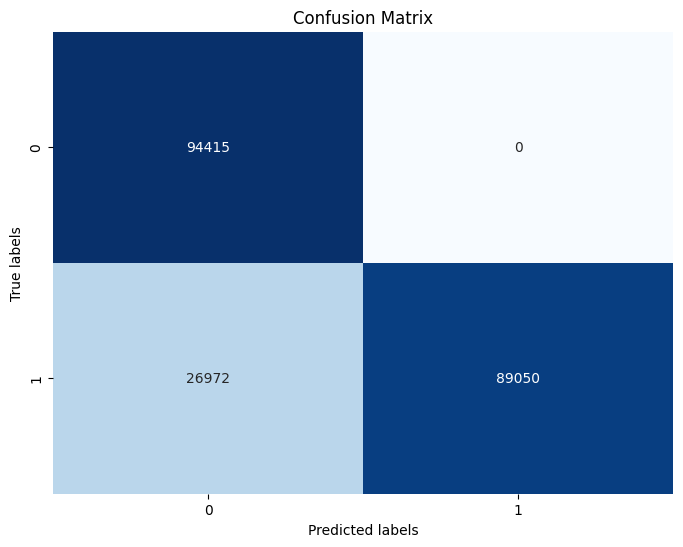

In [162]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()